<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/Symulator_tytanica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset('titanic')
print(df.head(200))

     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
195         1       1  female  58.0      0      0  146.5208        C   First   
196         0       3    male   NaN      0      0    7.7500        Q   Third   
197         0       3    male  42.0      0      1    8.4042        S   Third   
198         1       3  female   NaN      0      0    7.7500        Q   Third   
199         0       2  female  24.0      0      0   13.0000        S  Second   

       who  adult_male deck  embark_tow

In [22]:
print(df.iloc[0], '\n')
print(df.iloc[:, 1])

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object 

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64


In [23]:
print("\nLiczba brakujących wartości przed czyszczeniem:")
print(df.isnull().sum())


Liczba brakujących wartości przed czyszczeniem:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


`dropna()` to funkcja w Pandas, która usuwa wiersze lub kolumny zawierające brakujące dane (NaN)

In [24]:
# Usunięcie rekordów z brakującą daną w poli 'age' i wyświetlenie danych o liczbie wierszy
df = df.dropna(subset=['age'])

print("\nLiczba brakujących wartości po czyszczeniu (tylko age):")
print(df.isnull().sum())


Liczba brakujących wartości po czyszczeniu (tylko age):
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64


In [25]:
print(f"\nLiczba wierszy przed czyszczeniem: {len(sns.load_dataset('titanic'))}")
print(f"Liczba wierszy po czyszczeniu: {len(df)}")


Liczba wierszy przed czyszczeniem: 891
Liczba wierszy po czyszczeniu: 714


In [26]:
# Sekcja 3: Kategoryzacja opłat za bilety
def categorize_fare(fare, fare_ranges):
    if fare <= fare_ranges[0]:
        return 0  # niska
    elif fare <= fare_ranges[1]:
        return 1  # średnia
    else:
        return 2  # wysoka
    #macierz pomyłek
min_fare = df['fare'].min()
max_fare = df['fare'].max()
fare_step = (max_fare - min_fare) / 3
fare_ranges = [min_fare + fare_step, min_fare + 2 * fare_step]

print("\nPrzedziały cenowe biletów:")
print(f"Niska: {min_fare:.2f} - {fare_ranges[0]:.2f}")
print(f"Średnia: {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
print(f"Wysoka: {fare_ranges[1]:.2f} - {max_fare:.2f}")


Przedziały cenowe biletów:
Niska: 0.00 - 170.78
Średnia: 170.78 - 341.55
Wysoka: 341.55 - 512.33


`.map` to metoda, która zastępuje każdą wartość w kolumnie (Series) inną wartością według podanego słownika lub funkcji

In [27]:
# Sekcja 4: Przygotowanie danych do modelowania
selected_features = ['sex', 'pclass', 'age', 'fare_category']
df_model = df.copy()
df_model['sex'] = df_model['sex'].map({'male': 0, 'female': 1}) #
df_model['fare_category'] = df_model['fare'].apply(lambda x: categorize_fare(x, fare_ranges))

In [28]:
# Sekcja 5: Podział danych i skalowanie
# Przygotowanie danych
X = df_model[selected_features]
y = df_model['survived']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Sekcja 6: Trenowanie i ocena modelu
model = LogisticRegression(
    random_state=42,          # zapewnia powtarzalność wyników
    C=0.2               # siła regularyzacji (odwrotność)
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\nWyniki modelu:")
print(f"Dokładność modelu: {accuracy:.3f}")


Wyniki modelu:
Dokładność modelu: 0.741


In [30]:
# Sekcja 7: Analiza metryk i macierzy pomyłek
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nDodatkowe metryki:")
print(f"Czułość (recall): {sensitivity:.3f}")
print(f"Precyzja: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        87
           1       0.67      0.66      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143


Dodatkowe metryki:
Czułość (recall): 0.661
Precyzja: 0.673
F1 Score: 0.667


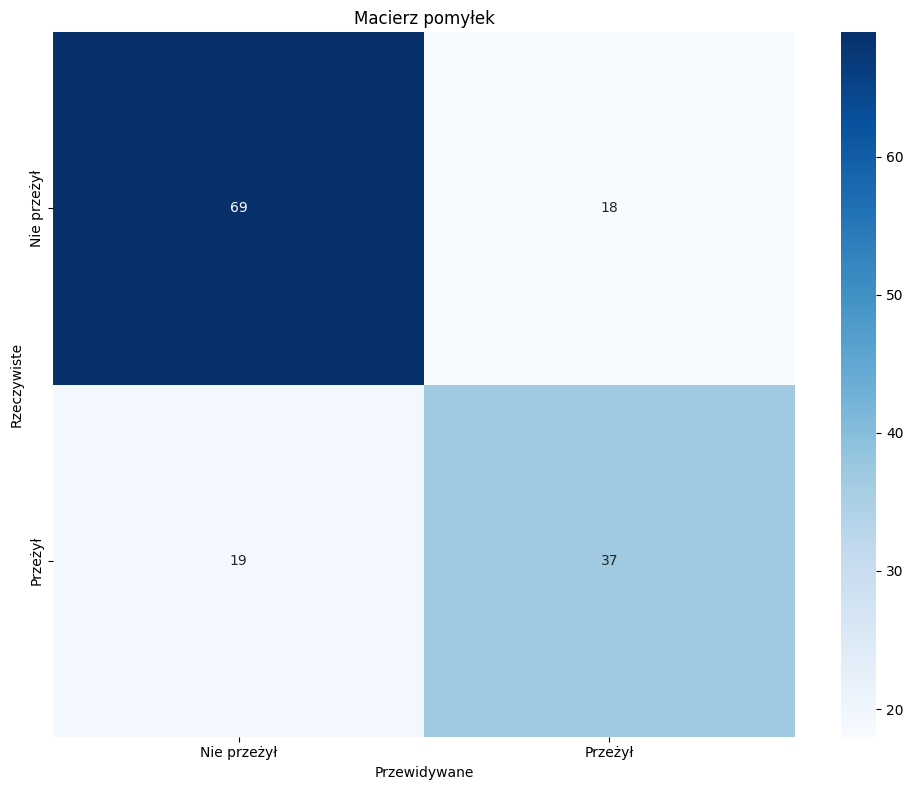

In [31]:
# Sekcja 8: Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Nie przeżył', 'Przeżył'],
            yticklabels=['Nie przeżył', 'Przeżył'])
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.tight_layout()
plt.show()